##Prject Overview:-
Focuses on leveraging machine learning classification techniques to develop an effective fraud detection system for Fastag transactions. The dataset comprises key features such as transaction details, vehicle information, geographical location, and transaction amounts. The goal is to create a robust model that can accurately identify instances of fraudulent activity, ensuring the integrity and security of Fastag transactions.

##Principle Aim:-
The main goal is to develop a robust fraud detection system for Fastag transactions using machine learning. By analyzing transaction details, vehicle information, location, and amounts, the system aims to accurately identify fraudulent activities, ensuring the security and integrity of Fastag transactions.

In [1]:
# Data Loading
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/FastagFraudDetection.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [2]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [3]:
df.head(20)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
5,6,1/11/2023 10:00,Sedan,FTG-066-GHI-987,A-101,Regular,Medium,160,100,"13.059816123454882, 77.77068662374292",105,KA77KL0123,Fraud
6,7,1/12/2023 15:40,SUV,FTG-707-JKL-210,B-102,Express,Large,180,160,"13.059816123454882, 77.77068662374292",70,KA22MN4567,Fraud
7,8,1/13/2023 20:15,Bus,FTG-088-UVW-543,C-103,Regular,Large,350,90,"13.059816123454882, 77.77068662374292",88,KA21OP8901,Fraud
8,9,1/14/2023 1:55,Car,FTG-909-RST-876,A-101,Express,Small,120,0,"13.059816123454882, 77.77068662374292",45,KA16QR2345,Fraud
9,10,1/15/2023 7:30,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",72,KA22ST6789,Not Fraud


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [5]:
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [6]:
df.shape

(5000, 13)

In [57]:
print(df.columns)

Index(['Timestamp', 'FastagID', 'TollBoothID', 'Transaction_Amount',
       'Amount_paid', 'Vehicle_Speed', 'Vehicle_Plate_Number',
       'Fraud_indicator', 'Hour', 'Day', 'Month', 'Amount_Difference',
       'Payment_Ratio', 'Vehicle_Type_Bus ', 'Vehicle_Type_Car',
       'Vehicle_Type_Motorcycle', 'Vehicle_Type_SUV', 'Vehicle_Type_Sedan',
       'Vehicle_Type_Truck', 'Vehicle_Type_Van', 'Lane_Type_Express',
       'Lane_Type_Regular', 'Vehicle_Dimensions_Large',
       'Vehicle_Dimensions_Medium', 'Vehicle_Dimensions_Small', 'Latitude',
       'Longitude'],
      dtype='object')


In [7]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.isnull()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
df=df.set_index('Transaction_ID')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_Amount,4451.0,180.927881,103.004437,0.0,110.0,140.0,300.0,350.0
Amount_paid,4451.0,158.684565,99.857565,0.0,100.0,120.0,180.0,350.0
Vehicle_Speed,4451.0,67.884745,16.632295,10.0,55.0,67.0,82.0,118.0


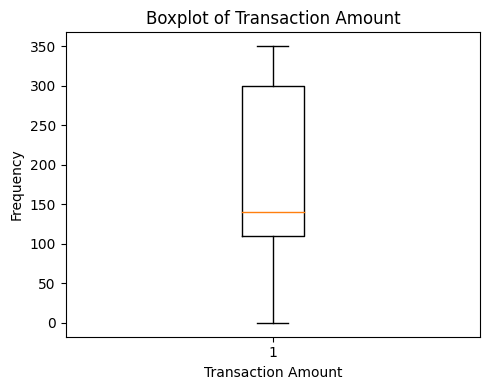

In [29]:
plt.figure(figsize=(5,4))

plt.boxplot(df['Transaction_Amount'])
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Boxplot of Transaction Amount')


plt.tight_layout()
plt.show()

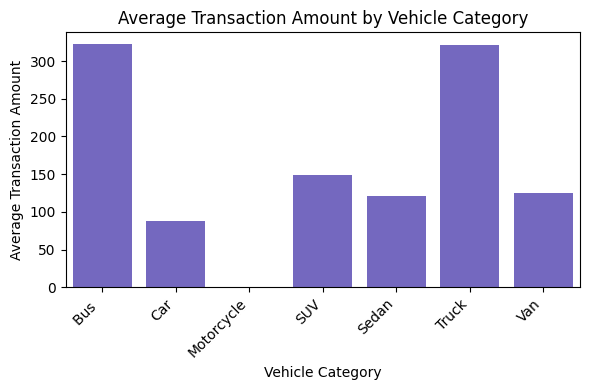

In [30]:
avg_transaction_amounts = df.groupby('Vehicle_Type')['Transaction_Amount'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='Vehicle_Type', y='Transaction_Amount', data=avg_transaction_amounts, color='#6A5ACD')
plt.xlabel('Vehicle Category')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount by Vehicle Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

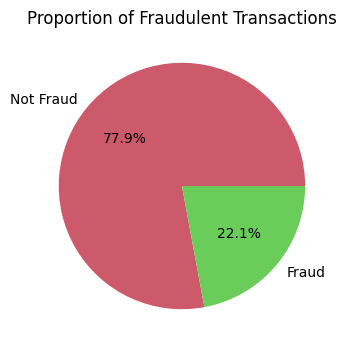

In [31]:
plt.figure(figsize=(6,4))
df['Fraud_indicator'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#CD5A6A', '#6ACD5A'])
plt.title('Proportion of Fraudulent Transactions')
plt.ylabel('')
plt.show()

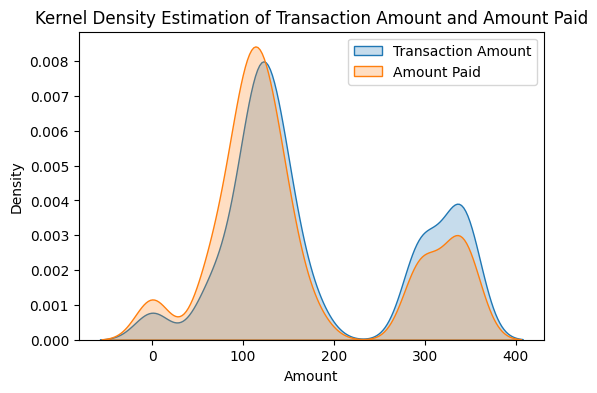

In [32]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df['Transaction_Amount'], fill=True, label='Transaction Amount')
sns.kdeplot(data=df['Amount_paid'], fill=True, label='Amount Paid')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Transaction Amount and Amount Paid')
plt.legend()
plt.show()

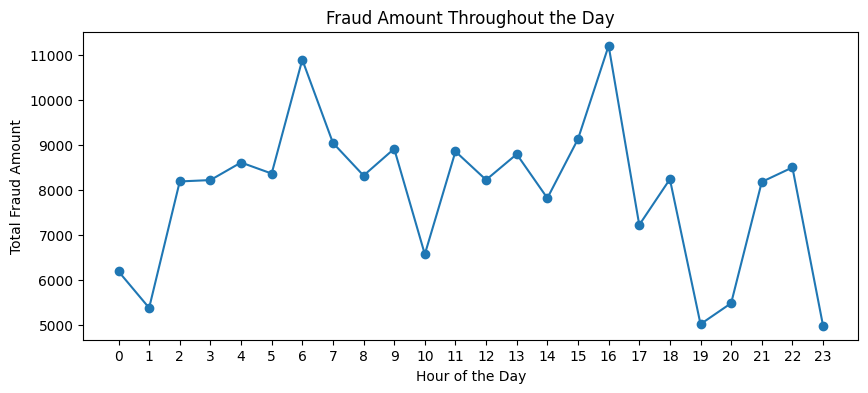

In [33]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract hour from the timestamp
df['Hour'] = df['Timestamp'].dt.hour

# Filter fraudulent transactions
fraudulent_transactions = df[df['Fraud_indicator'] == 'Fraud']

# Group by hour and sum transaction amount
fraudulent_amount_by_hour = fraudulent_transactions.groupby('Hour')['Transaction_Amount'].sum()

plt.figure(figsize=(10, 4))
fraudulent_amount_by_hour.plot(marker='o', linestyle='-')
plt.title('Fraud Amount Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Fraud Amount')
plt.xticks(range(24))
plt.show()

In [8]:
print("Missing values in 'FastagID':", df['FastagID'].isnull().sum())

Missing values in 'FastagID': 549


In [9]:
df = df.dropna(subset=['FastagID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4451 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Transaction_ID         4451 non-null   int64         
 1   Timestamp              4451 non-null   datetime64[ns]
 2   Vehicle_Type           4451 non-null   object        
 3   FastagID               4451 non-null   object        
 4   TollBoothID            4451 non-null   object        
 5   Lane_Type              4451 non-null   object        
 6   Vehicle_Dimensions     4451 non-null   object        
 7   Transaction_Amount     4451 non-null   int64         
 8   Amount_paid            4451 non-null   int64         
 9   Geographical_Location  4451 non-null   object        
 10  Vehicle_Speed          4451 non-null   int64         
 11  Vehicle_Plate_Number   4451 non-null   object        
 12  Fraud_indicator        4451 non-null   object        
dtypes: 

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

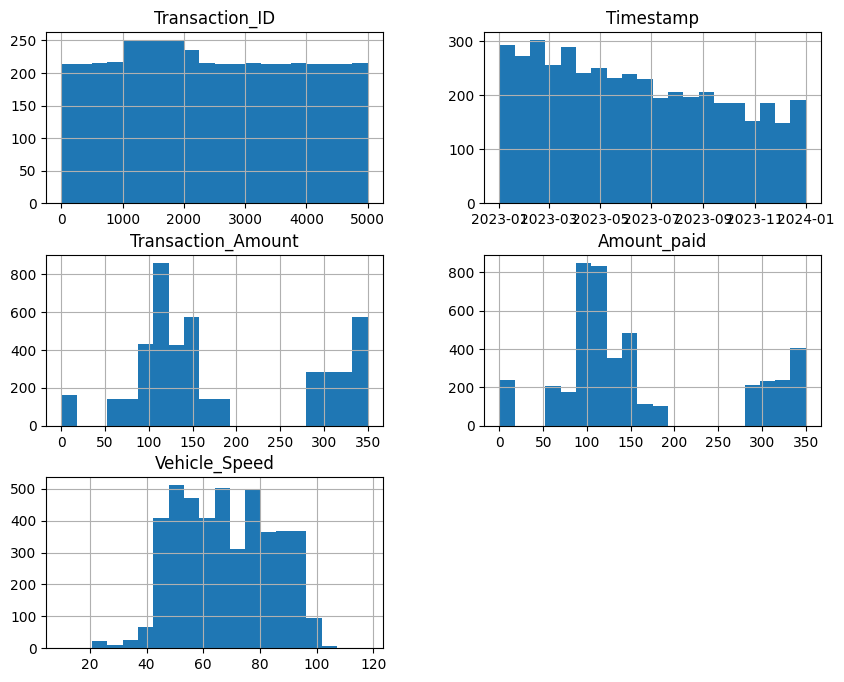

In [12]:
df.hist(figsize=(10, 8), bins=20)
plt.show()

<ipython-input-13-a0b8bf54ff9b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fraud_indicator', data=df, palette=['red', 'green'])


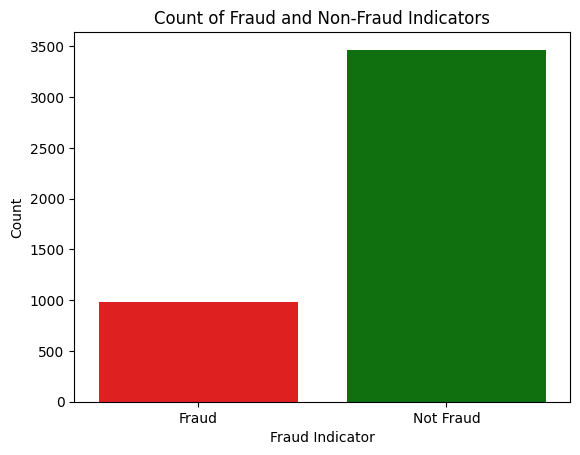

In [13]:
sns.countplot(x='Fraud_indicator', data=df, palette=['red', 'green'])
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.title('Count of Fraud and Non-Fraud Indicators')
plt.show()

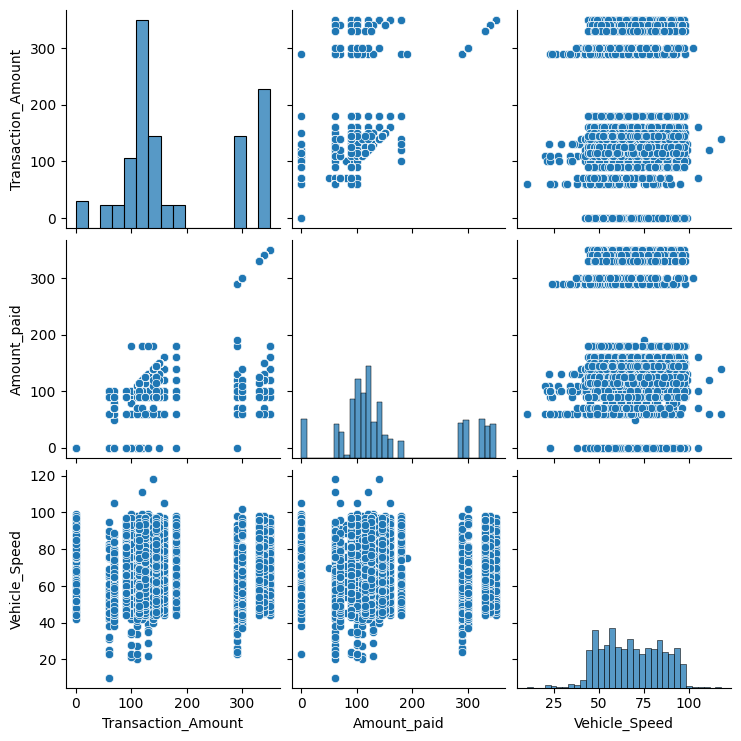

In [14]:
sns.pairplot(df, vars=['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed'])
plt.show()

<ipython-input-15-b6b2f11221a9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


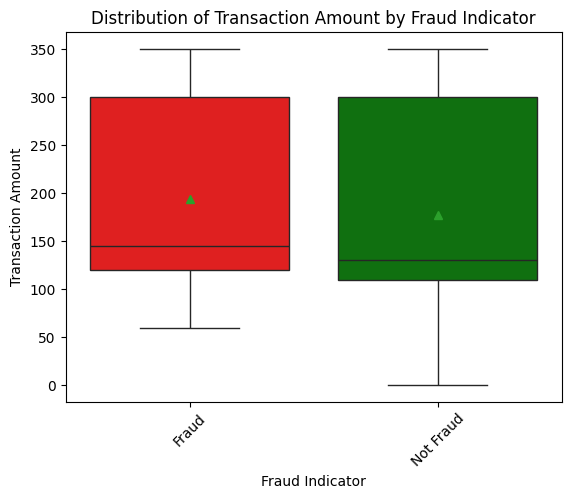

In [15]:
sns.boxplot(
    x = "Fraud_indicator",
    y = "Transaction_Amount",
    showmeans=True,
    data=df,
    palette=["red", "green"]
)

plt.xlabel("Fraud Indicator")
plt.ylabel("Transaction Amount")
plt.title("Distribution of Transaction Amount by Fraud Indicator")
plt.xticks(rotation=45)
plt.show()

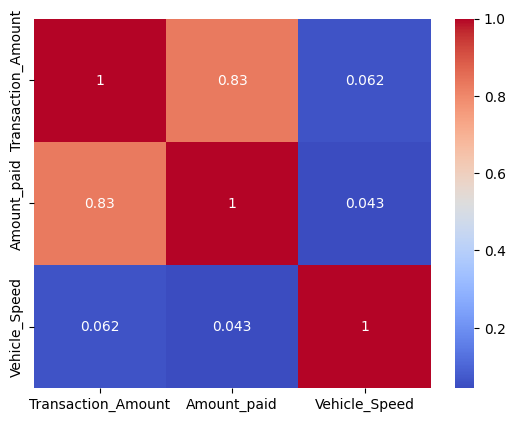

In [16]:
correlation_matrix = df[['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

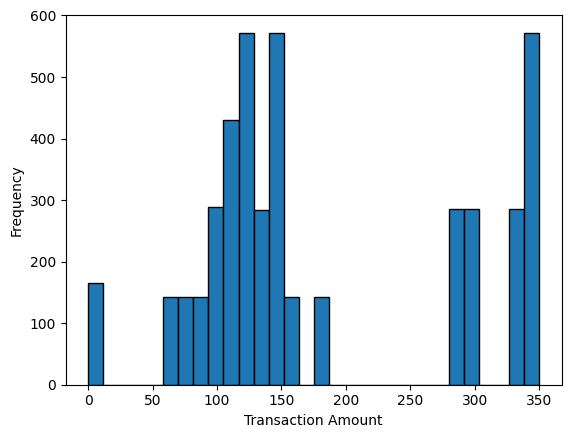

In [17]:
plt.hist(df['Transaction_Amount'], bins=30, edgecolor='black')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

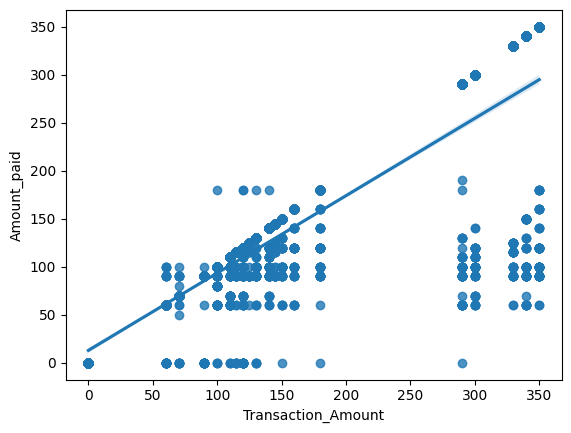

In [18]:
sns.regplot(x='Transaction_Amount', y='Amount_paid', data=df)
plt.show()

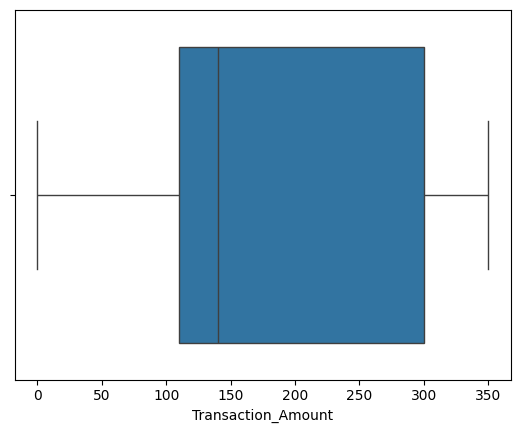

In [19]:
sns.boxplot(x='Transaction_Amount', data=df)
plt.show()

In [20]:
selected_features = ['Transaction_Amount', 'Amount_paid']
X = df[selected_features]
y = df['Fraud_indicator']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.preprocessing import LabelEncoder
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [22]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                96        
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.fit(X_train_scaled, y_train_encoded, epochs=40, batch_size=32, validation_split=0.2)

Epoch 1/40
89/89 [==============================] - 0s 3ms/step - loss: 0.0652 - accuracy: 0.9838 - val_loss: 0.0857 - val_accuracy: 0.9817
Epoch 2/40
89/89 [==============================] - 0s 4ms/step - loss: 0.0616 - accuracy: 0.9838 - val_loss: 0.0842 - val_accuracy: 0.9874
Epoch 3/40
89/89 [==============================] - 0s 3ms/step - loss: 0.0589 - accuracy: 0.9842 - val_loss: 0.0803 - val_accuracy: 0.9817
Epoch 4/40
89/89 [==============================] - 0s 4ms/step - loss: 0.0564 - accuracy: 0.9849 - val_loss: 0.0783 - val_accuracy: 0.9817
Epoch 5/40
89/89 [==============================] - 0s 4ms/step - loss: 0.0543 - accuracy: 0.9870 - val_loss: 0.0763 - val_accuracy: 0.9817
Epoch 6/40
89/89 [==============================] - 0s 4ms/step - loss: 0.0525 - accuracy: 0.9877 - val_loss: 0.0747 - val_accuracy: 0.9874
Epoch 7/40
89/89 [==============================] - 0s 4ms/step - loss: 0.0508 - accuracy: 0.9895 - val_loss: 0.0728 - val_accuracy: 0.9874
Epoch 8/40
89/89 [==

In [26]:
y_pred_prob = model.predict(X_test_scaled)
# Convert probabilities to binary predictions
y_pred = np.round(y_pred_prob)
# Print accuracy metrics
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred)
# Print accuracy metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

28/28 [==============================] - 0s 5ms/step
Accuracy: 99.66%
Precision: 99.57%
Recall: 100.00%
F1 Score: 99.79%


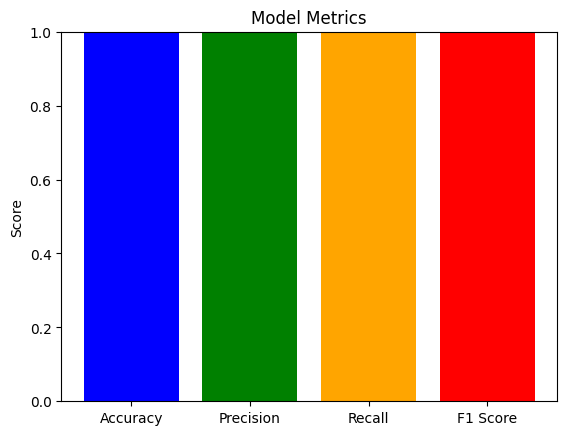

In [27]:
import matplotlib.pyplot as plt


metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [99.66 ,99.57, 100.00 , 99.79]

plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.ylabel('Score')
plt.title('Model Metrics')
plt.ylim(0, 1)
plt.show()

In [34]:
df['Day']=df['Timestamp'].dt.dayofweek

df['Month']=df['Timestamp'].dt.month

In [35]:
# Calculate the difference between "Transaction_Amount" and "Amount_paid"
df['Amount_Difference'] = df['Transaction_Amount'] - df['Amount_paid']

# Calculate the ratio of "Amount_paid" to "Transaction_Amount"
df['Payment_Ratio'] = df['Amount_paid'] / df['Transaction_Amount']

In [36]:
df.head(2)

,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Hour,Day,Month,Amount_Difference,Payment_Ratio
Transaction_ID,,,,,,,,,,,,,,,,,
1,2023-01-06 11:20:00,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud,11,4,1,230,0.342857
2,2023-01-07 14:55:00,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud,14,5,1,20,0.833333


In [37]:
df = pd.get_dummies(df, columns=['Vehicle_Type', 'Lane_Type', 'Vehicle_Dimensions'])

In [38]:
label_encoder = LabelEncoder()
df['Fraud_indicator'] = label_encoder.fit_transform(df['Fraud_indicator'])

In [39]:
df.head(3)

,Timestamp,FastagID,TollBoothID,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Hour,...,Vehicle_Type_Motorcycle,Vehicle_Type_SUV,Vehicle_Type_Sedan,Vehicle_Type_Truck,Vehicle_Type_Van,Lane_Type_Express,Lane_Type_Regular,Vehicle_Dimensions_Large,Vehicle_Dimensions_Medium,Vehicle_Dimensions_Small
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
1,2023-01-06 11:20:00,FTG-001-ABC-121,A-101,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,0,11,...,0,0,0,0,0,1,0,1,0,0
2,2023-01-07 14:55:00,FTG-002-XYZ-451,B-102,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,0,14,...,0,0,0,0,0,0,1,0,0,1
4,2023-01-09 02:05:00,FTG-044-LMN-322,C-103,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,0,2,...,0,0,0,1,0,0,1,1,0,0


In [40]:
# Extract latitude and longitude from 'Geographical_Location'
df['Latitude'] = df['Geographical_Location'].apply(lambda x: float(x.split(',')[0]))
df['Longitude'] = df['Geographical_Location'].apply(lambda x: float(x.split(',')[1]))

# Drop the original 'Geographical_Location' column
df.drop(columns=['Geographical_Location'], inplace=True)

In [41]:
df.head(3)

,Timestamp,FastagID,TollBoothID,Transaction_Amount,Amount_paid,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Hour,Day,...,Vehicle_Type_Sedan,Vehicle_Type_Truck,Vehicle_Type_Van,Lane_Type_Express,Lane_Type_Regular,Vehicle_Dimensions_Large,Vehicle_Dimensions_Medium,Vehicle_Dimensions_Small,Latitude,Longitude
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
1,2023-01-06 11:20:00,FTG-001-ABC-121,A-101,350,120,65,KA11AB1234,0,11,4,...,0,0,0,1,0,1,0,0,13.059816,77.770687
2,2023-01-07 14:55:00,FTG-002-XYZ-451,B-102,120,100,78,KA66CD5678,0,14,5,...,0,0,0,0,1,0,0,1,13.059816,77.770687
4,2023-01-09 02:05:00,FTG-044-LMN-322,C-103,350,120,92,KA11GH3456,0,2,0,...,0,1,0,0,1,1,0,0,13.059816,77.770687


In [42]:
df.Fraud_indicator.value_counts()

1    3468
0     983
Name: Fraud_indicator, dtype: int64

In [45]:
# Separate features and target variable
X = df.drop(columns=['Fraud_indicator', 'Timestamp', 'FastagID', 'TollBoothID','Vehicle_Plate_Number'])
X

,Transaction_Amount,Amount_paid,Vehicle_Speed,Hour,Day,Month,Amount_Difference,Payment_Ratio,Vehicle_Type_Bus,Vehicle_Type_Car,...,Vehicle_Type_Sedan,Vehicle_Type_Truck,Vehicle_Type_Van,Lane_Type_Express,Lane_Type_Regular,Vehicle_Dimensions_Large,Vehicle_Dimensions_Medium,Vehicle_Dimensions_Small,Latitude,Longitude
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
1,350,120,65,11,4,1,230,0.342857,1,0,...,0,0,0,1,0,1,0,0,13.059816,77.770687
2,120,100,78,14,5,1,20,0.833333,0,1,...,0,0,0,0,1,0,0,1,13.059816,77.770687
4,350,120,92,2,0,1,230,0.342857,0,0,...,0,1,0,0,1,1,0,0,13.059816,77.770687
5,140,100,60,6,1,1,40,0.714286,0,0,...,0,0,1,1,0,0,1,0,13.059816,77.770687
6,160,100,105,10,2,1,60,0.625000,0,0,...,1,0,0,0,1,0,1,0,13.059816,77.770687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,330,330,81,22,6,1,0,1.000000,0,0,...,0,1,0,0,1,1,0,0,13.213316,77.554135
4997,125,125,64,13,1,1,0,1.000000,0,0,...,0,0,1,1,0,0,1,0,13.213316,77.554135
4998,115,115,93,5,6,2,0,1.000000,0,0,...,1,0,0,0,1,0,1,0,13.213316,77.554135


In [46]:
y = df['Fraud_indicator']
y

Transaction_ID
1       0
2       0
4       0
5       0
6       0
       ..
4996    1
4997    1
4998    1
4999    1
5000    0
Name: Fraud_indicator, Length: 4451, dtype: int64

In [49]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the features and transform the features
X_imputed = imputer.fit_transform(X)

rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_imputed, y)

feature_importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top 5 important features
top_n = 5
print(f"Top {top_n} Important Features:")
print(feature_importance_df.head(top_n))

Top 5 Important Features:
                     Feature  Importance
6          Amount_Difference    0.479879
7              Payment_Ratio    0.352243
1                Amount_paid    0.092946
0         Transaction_Amount    0.026552
19  Vehicle_Dimensions_Small    0.010919


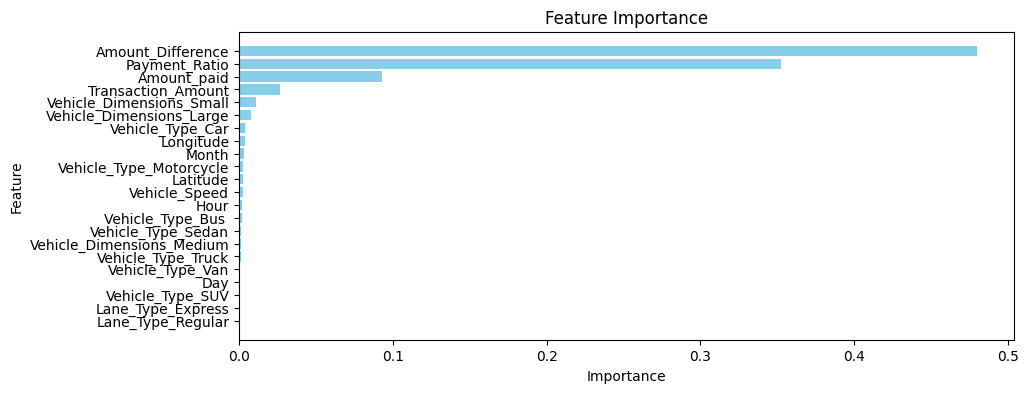

In [50]:
plt.figure(figsize=(10, 4))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [52]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [53]:
top_features = feature_importance_df.head(5)['Feature'].tolist()
X_top_features = X[top_features]
y = df['Fraud_indicator']

# StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

logistic_model = LogisticRegression()

# Initialize lists to store evaluation metrics
accuracies = []

# Perform cross-validation
for train_index, test_index in skf.split(X_top_features, y):
    X_train, X_test = X_top_features.iloc[train_index], X_top_features.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # Fit the model
    logistic_model.fit(X_train_imputed, y_train)

    # Make predictions
    y_pred = logistic_model.predict(X_test_imputed)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Calculate mean accuracy
mean_accuracy = np.mean(accuracies)
print("Mean Accuracy of stratified cross validation:", mean_accuracy)

# Display classification report using the entire dataset
X_imputed = imputer.fit_transform(X_top_features)
logistic_model.fit(X_imputed, y)
y_pred = logistic_model.predict(X_imputed)
print("Classification Report:")
print(classification_report(y, y_pred))

Mean Accuracy of stratified cross validation: 0.9836002976077882
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       983
           1       0.98      1.00      0.99      3468

    accuracy                           0.98      4451
   macro avg       0.99      0.96      0.98      4451
weighted avg       0.98      0.98      0.98      4451



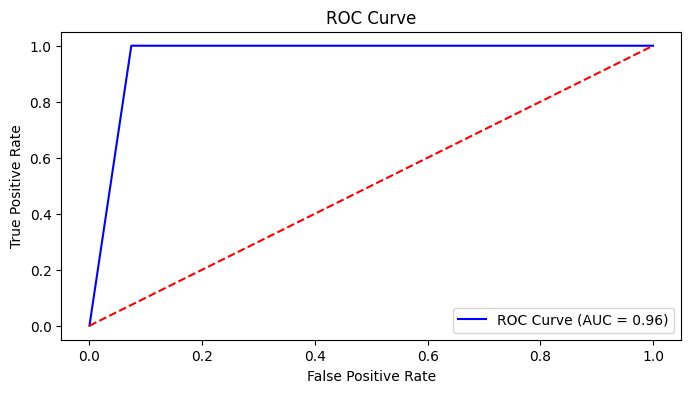

In [54]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='b', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

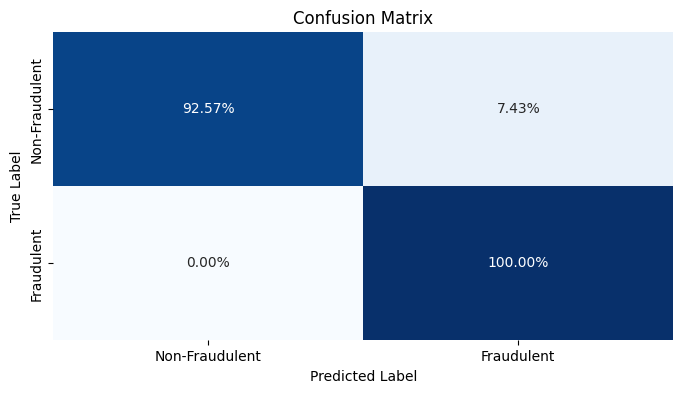

In [55]:
# Calculate confusion matrix
cm = confusion_matrix(y, y_pred)

# Normalize confusion matrix
cm_norm = cm / cm.sum(axis=1)[:, np.newaxis]  # Normalize along the true labels (rows)

# Define class labels
class_labels = ['Non-Fraudulent', 'Fraudulent']

# Plot confusion matrix with probabilities
plt.figure(figsize=(8, 4))
sns.heatmap(cm_norm, annot=True, cmap='Blues', fmt='.2%', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()